# Spaceship Titanic - Machine Learning Competition

### Group Members
       Muaawiyah Dadabhay
       Muhammed Raees Dindar
       Taahir Kolia
       Irfaan Mia

## Introduction

In this notebook, four machine-learning models are employed to predict whether passengers were transported to an alternate dimension, utilizing data frames sourced from Kaggle. The models utilized include _w_, _x_, _y_, and _z_.

Kaggle stands as a prominent data science platform renowned for hosting competitions and challenges in the field. It boasts a vibrant community comprising data scientists, statisticians, and machine learning experts who actively contribute their expertise to various projects.

For this particular endeavor, we leverage the Spaceship Titanic dataset available on Kaggle. The primary objective of this notebook is to ascertain which passengers were transported to an alternate dimension subsequent to a spaceship collision.

The methodology entails an initial data analysis, followed by feature engineering to facilitate modeling. Subsequently, the models are constructed and trained utilizing the provided dataset. Finally, comprehensive evaluations of all four models are conducted to ascertain the optimal choice for predicting passenger transportation to alternate dimensions.

## Importing of Python Libraries

In [2]:
#General imports
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

#Analysis imports
##import sweetviz as sw
import matplotlib.pyplot as plt

#Imputator and encoder imports
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.preprocessing import StandardScaler

#Evaluation imports
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report

#Classifiers imports
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Feature elimination imports
from sklearn.feature_selection import RFE
from sklearn.inspection import permutation_importance

#Hyperparameter tuning imports
from sklearn.model_selection import GridSearchCV
#import optuna

#I dont know just something it was recommended not sure why
import warnings
warnings.filterwarnings("ignore")

## 1. Gathering and Understanding Data

### Loading Data from a CSV

In [3]:
test_df = pd.read_csv("../data/test.csv")
train_df = pd.read_csv("../data/train.csv")

### Viewing of the Data

In [4]:
test_df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus


In [5]:
train_df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


### Understanding the Data at Hand

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Upon examining the dataframes, we've identified categorical data, which comprises of non-numerical information. Specifically, the categorical features identified include HomePlanet, CryoSleep, Destination, and VIP. These categorical features will undergo transformation into numerical representations as the investigation progresses.

### Determining Duplicate Values

In [8]:
print(f"The total duplicates in the test dataframe are: {test_df.duplicated().sum()}")
print(f"The total duplicates in the train dataframe are: {train_df.duplicated().sum()}")

The total duplicates in the test dataframe are: 0
The total duplicates in the train dataframe are: 0


### Determining Missing Values

In [9]:
print("Test Dataframes Missing Values")
test_df.isna().sum()

Test Dataframes Missing Values


PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [10]:
print("Train Dataframes Missing Values")
train_df.isna().sum()

Train Dataframes Missing Values


PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

It has been observed that both dataframes contain missing values. In order to address this issue, certain inference and data manipulation steps need to be undertaken to rectify any missing data. However, this task will be deferred until later in the investigation.

For the current stage, the missing values will be replaced with _NaN_. Prior to this replacement, we will merge both dataframes to facilitate the process of filling in values. Subsequently, the dataframes will be separated again as needed in the subsequent stages of the analysis.

In [11]:
combined_df = pd.concat([train_df, test_df], ignore_index=True)
temp_combined_df = combined_df.copy()

In [12]:
combined_df.replace('', np.NaN, inplace=True)
combined_df.fillna(np.NaN, inplace=True)
combined_df.tail(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
12967,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
12968,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN
12969,9277_01,Earth,True,G/1498/S,PSO J318.5-22,43.0,False,0.0,0.0,0.0,0.0,0.0,Lilace Leonzaley,NaN


## 2. Data Analysis

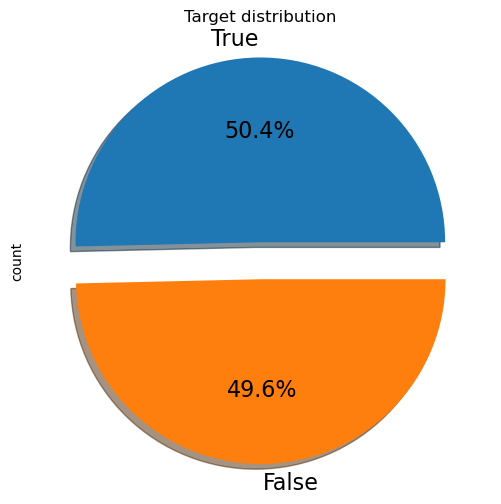

In [13]:
# Figure size
plt.figure(figsize=(6,6));

# Pie plot
train_df['Transported'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True, textprops={'fontsize':16}).set_title("Target distribution");

The target feature is "Transported" which indicates whether or not a passenger was transported to another dimension. Approximately half of all passengers on board were transported.

### Categorical Feature Analysis

The categorical features will be analysed to determine how the target feature depends on the categorical features.

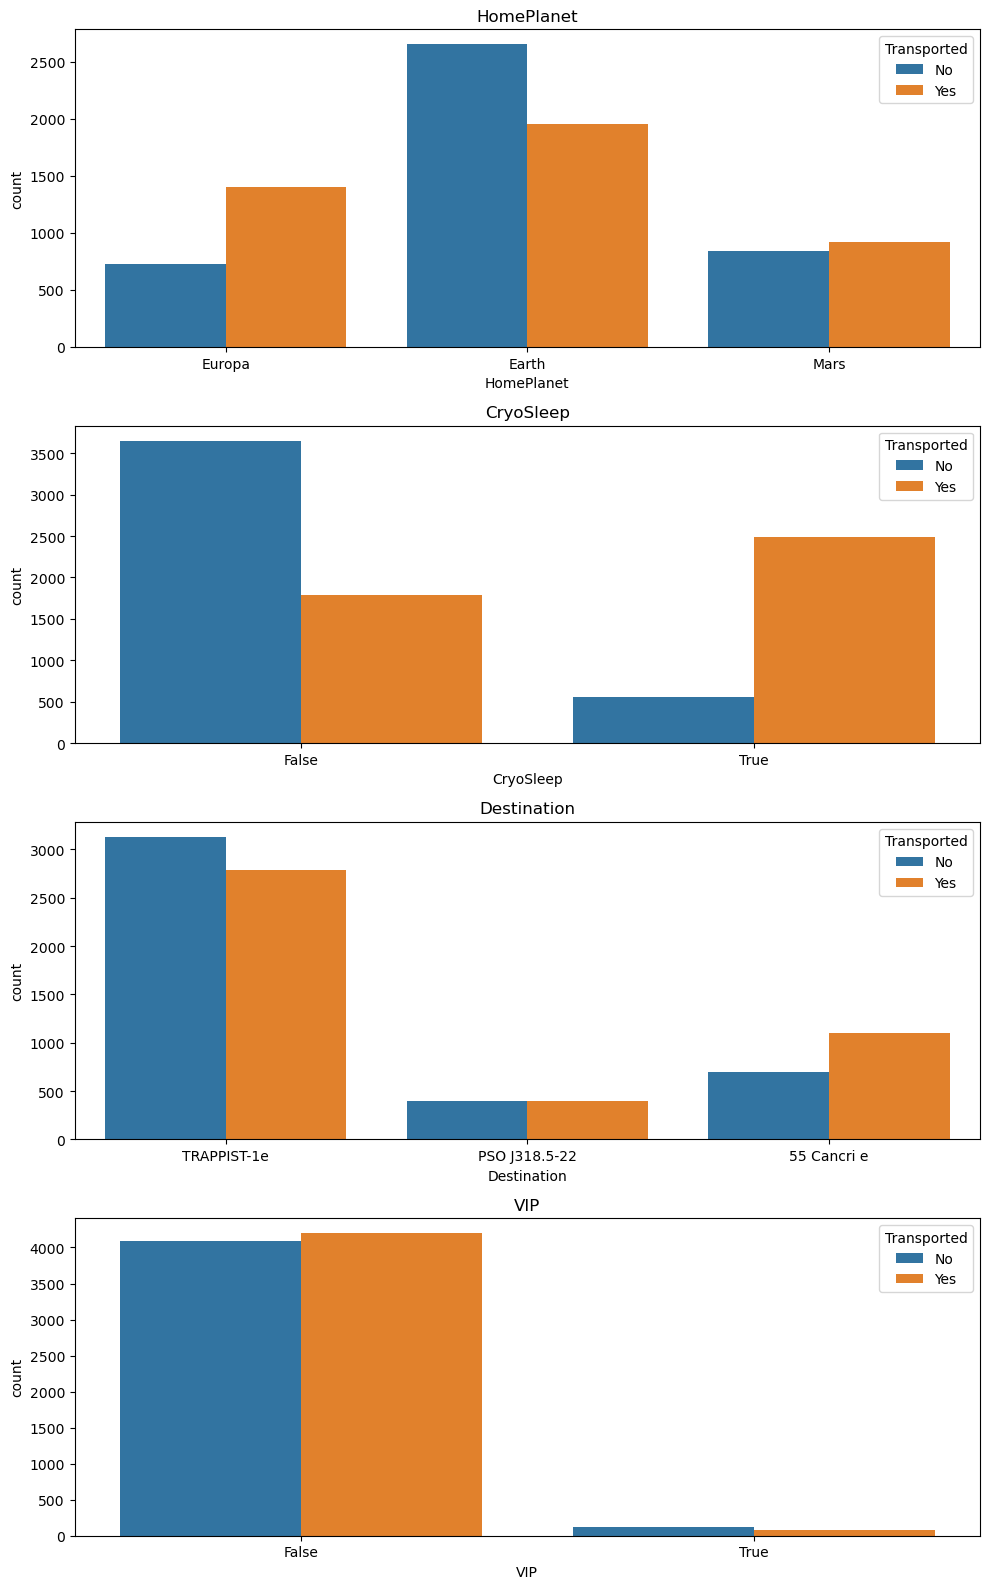

In [14]:
# Categorical features
cat_feats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Convert boolean values to strings ('Yes' and 'No')
temp_combined_df['Transported'] = combined_df['Transported'].map({True: 'Yes', False: 'No'})

# Plot categorical features
fig = plt.figure(figsize=(10, 16))
for i, var_name in enumerate(cat_feats):
    ax = fig.add_subplot(4, 1, i + 1)
    sns.countplot(data=temp_combined_df, x=var_name, ax=ax, hue='Transported')
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

The relationship between categorical features and "Transported" are investigated. There  is no direct relationship between "Transported" and "HomePlanet", "Destination", and "VIP". "CryoSleep" appears to have a relationship with "Transported". People that are in CryoSleep have a higher liklihood of being transported compared to people not in CryoSleep [1].

[1]https://www.kaggle.com/code/samuelcortinhas/spaceship-titanic-a-complete-guide#EDA

### Numerical Feature Analysis


The numerical features will be analysed to determine how the target feature depends on the numerical features.

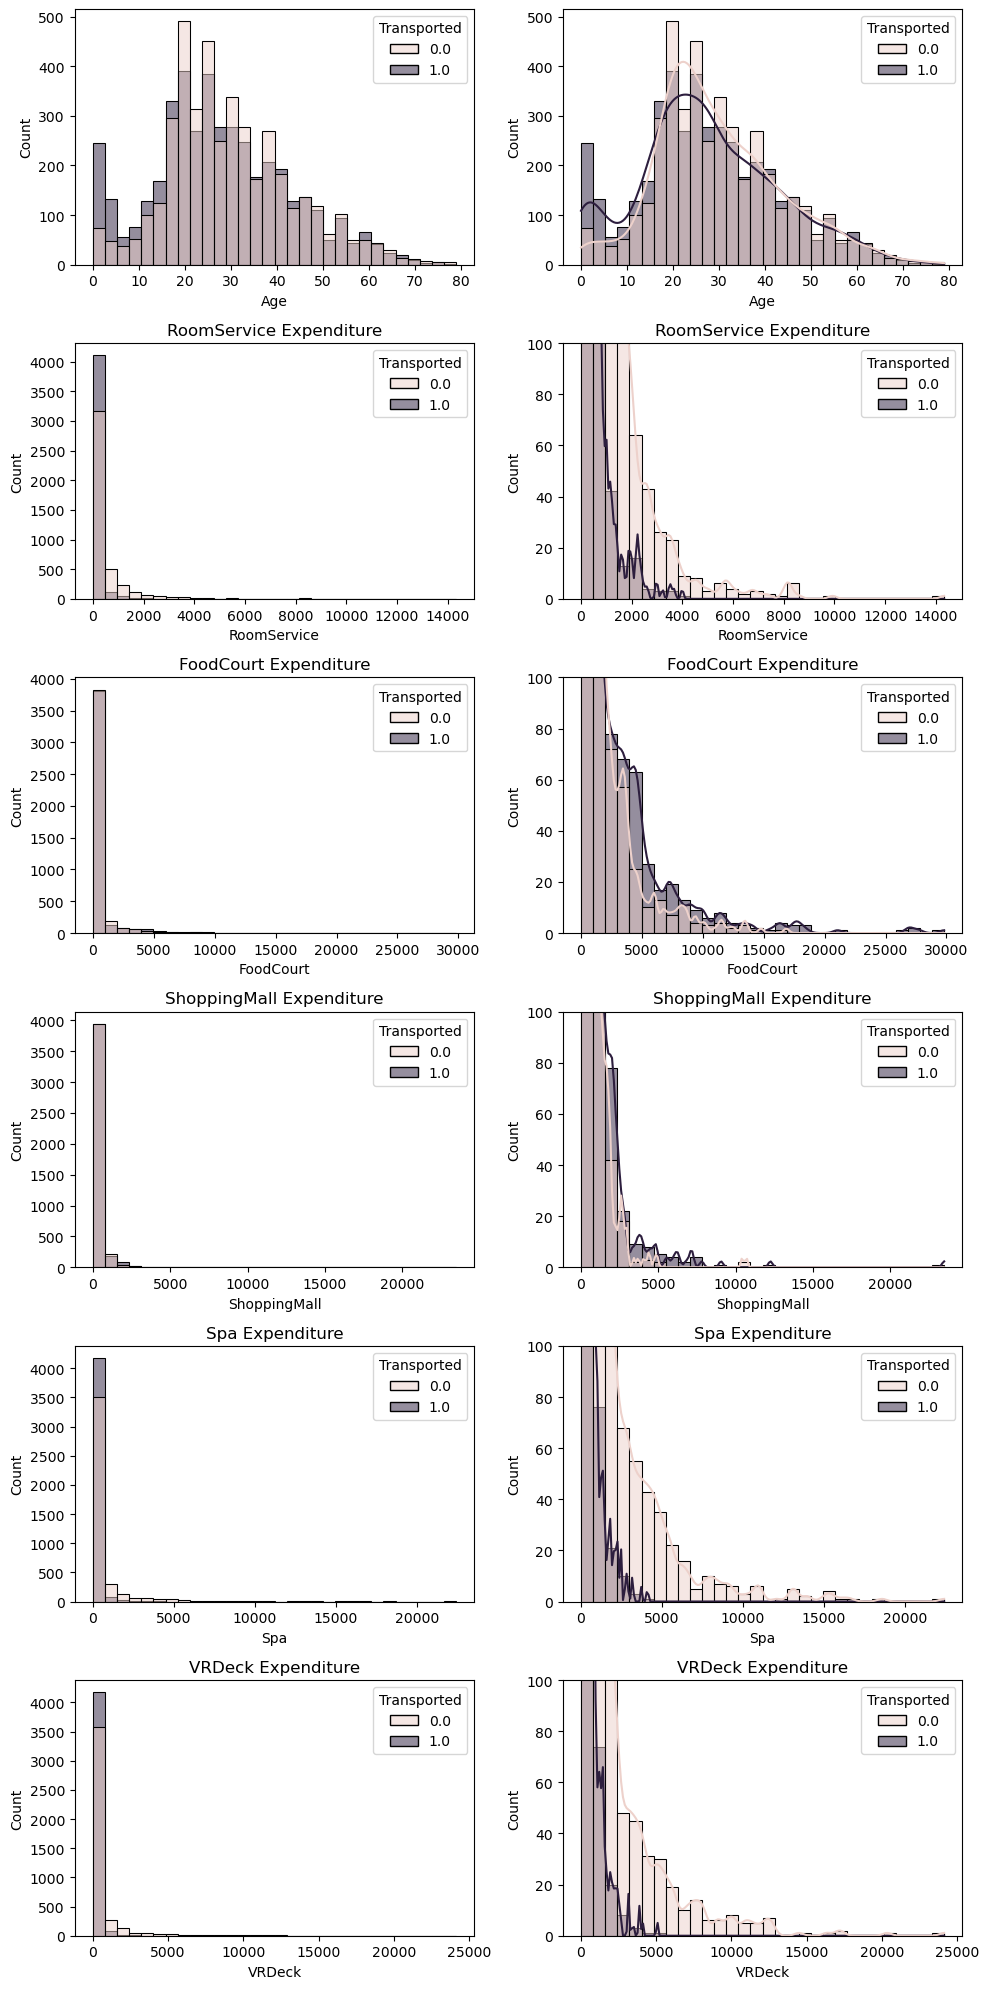

In [15]:
# Numerical features
num_feats=['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Plot numerical features
fig=plt.figure(figsize=(10,20))
for i, var_name in enumerate(num_feats):
    # Left plot
    ax=fig.add_subplot(6,2,2*i+1)
    sns.histplot(data=combined_df, x=var_name, axes=ax, bins=30, kde=False, hue='Transported')
    if(i!=0):
        ax.set_title(var_name + " Expenditure")
    
    # Right plot (truncated)
    ax=fig.add_subplot(6,2,2*i+2)
    sns.histplot(data=combined_df, x=var_name, axes=ax, bins=30, kde=True, hue='Transported')
    if(i!=0):
        plt.ylim([0,100])
        ax.set_title(var_name + " Expenditure")
fig.tight_layout()  # Improves appearance a bit

plt.show()

Majority of passengers did not spend any money. People that spent less money were more likely to be transported. We can build on the relationship between CryoSleep and Transported as people in CryoSleep would not have spent any money. A simple way to verify this observastion is to form some sort of relationship. To make it easier to analyse, we group all individial expense features into a singular expense feature. 

In [16]:
expense_feature = ['RoomService','FoodCourt','Spa','VRDeck','ShoppingMall']
combined_df['TotalExpenditure'] = combined_df.loc[:,expense_feature].sum(axis=1)

temp_combined_df['TotalExpenditure'] = temp_combined_df.loc[:,expense_feature].sum(axis=1)
combined_df.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalExpenditure
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0


In [17]:
# Convert 'TotalExpenditure' to a categorical variable indicating spent money or did not
temp_combined_df['TotalExpenditure'] = temp_combined_df['TotalExpenditure'].apply(lambda x: 'Spent Money' if x > 0 else 'Did Not Spend')

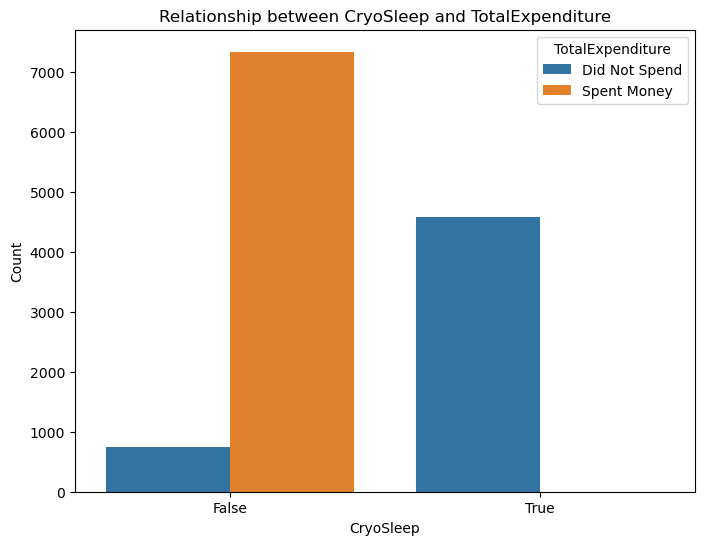

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='CryoSleep', hue='TotalExpenditure', data=temp_combined_df)
plt.title('Relationship between CryoSleep and TotalExpenditure')
plt.xlabel('CryoSleep')
plt.ylabel('Count')
plt.show()

In [19]:
combined_df.groupby('HomePlanet')['VIP'].mean()

HomePlanet
Earth          0.0
Europa    0.057843
Mars      0.034312
Name: VIP, dtype: object

In [20]:
combined_df.groupby('HomePlanet')['Transported'].mean()

HomePlanet
Earth     0.423946
Europa    0.658846
Mars      0.523024
Name: Transported, dtype: object

In [21]:
combined_df.groupby('Destination')['Transported'].mean()

Destination
55 Cancri e          0.61
PSO J318.5-22    0.503769
TRAPPIST-1e      0.471175
Name: Transported, dtype: object

In [22]:
combined_df.groupby('CryoSleep')['Transported'].mean()

CryoSleep
False    0.328921
True     0.817583
Name: Transported, dtype: object

In [23]:
combined_df.groupby('VIP')['TotalExpenditure'].mean()

VIP
False    1358.276510
True     4595.542125
Name: TotalExpenditure, dtype: float64

#### Age Analysis 



<Axes: >

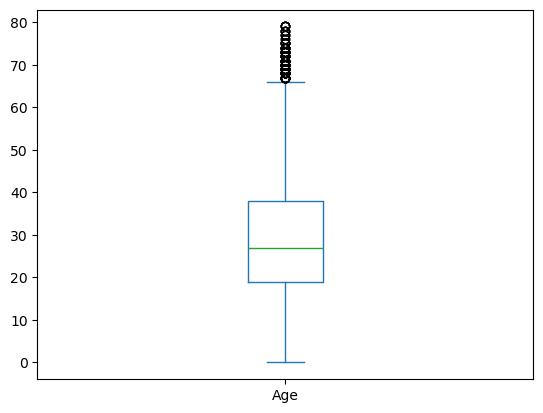

In [24]:
combined_df["Age"].plot(kind="box")

In [25]:
combined_df["Age"].describe()

count    12700.000000
mean        28.771969
std         14.387261
min          0.000000
25%         19.000000
50%         27.000000
75%         38.000000
max         79.000000
Name: Age, dtype: float64

## 3. Feature Engineering

### 3.1 Adjusting Features
#### 3.1.1 Cabins and Passenger IDs


The passengers' ID's and the Cabin location contain multiple forms of information that can be extracted into additional features. The cabin data is listed in the following format: _deck/num/side_. Therefore, we can split the cabin feature into three seperate features. Additionally, PassengerID is listed in the format _gggg _ pp_ , where _gggg_ represents the group number and _pp_ represents a passenger's number within a group. The PassengerID is extracted to form an additional feature

In [26]:
combined_df['Group'] = combined_df['PassengerId'].astype(str).str[:4]

counts = combined_df['Group'].value_counts()
combined_df['Group'] = combined_df['Group'].map(counts)

combined_df[['Deck', 'Number', 'Side']] = combined_df['Cabin'].str.split('/', expand=True)


combined_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,TotalExpenditure,Group,Deck,Number,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0.0,1,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,736.0,1,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,10383.0,2,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,5176.0,2,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1091.0,1,F,1,S


#### 3.1.2 Age


From the data analysis done in Section 2, it is seen that the range of the age of passengers is 79 years. This wide range of values in its current numerical form does not provide much meaningful information. However, this can be changed by binning the data into age groups, allowing for trends amongst age groups to be identified more easily. Additionally, having an age group feature will greatly reduce the complexity of models.
Passengers are grouped together in this particular way to identify a relationship between _Age Groups_ and the measured variable (_Transported_) and between _Age Groups_ and _TotalExpenditure_.

In [27]:
combined_df['AgeGroup']=np.nan
combined_df.loc[combined_df['Age']<=12,'AgeGroup']='1'
combined_df.loc[(combined_df['Age']>12) & (combined_df['Age']<18),'AgeGroup']='2'
combined_df.loc[(combined_df['Age']>=18) & (combined_df['Age']<=25),'AgeGroup']='3'
combined_df.loc[(combined_df['Age']>25) & (combined_df['Age']<=30),'AgeGroup']='4'
combined_df.loc[(combined_df['Age']>30) & (combined_df['Age']<=50),'AgeGroup']='5'
combined_df.loc[combined_df['Age']>50,'AgeGroup']='6'

In [28]:
combined_df.groupby('AgeGroup')['Transported'].mean()

AgeGroup
1    0.699752
2    0.553451
3    0.458103
4    0.496272
5    0.479432
6    0.484396
Name: Transported, dtype: object

In [29]:
combined_df.groupby('AgeGroup')['TotalExpenditure'].mean().fillna(0)

AgeGroup
1       0.000000
2     864.158085
3    1109.285911
4    1939.196378
5    1946.321492
6    1941.712022
Name: TotalExpenditure, dtype: float64

From the above relationships there are two key takeaways:
1. Passengers that are from the first _AgeGroup_ (0-12 years old) do not have any expenditure. 
2. Passengers that are from the first _AgeGroup_ (0-12 years old) are the most likely to be transported. 

### 3.2 Filling missing data entries


In [30]:
# Rearrange the order of the columns so that numerical columns are grouped together, categorical columns are grouped together, 
# and the target feature is at the end 
num_cols = ['ShoppingMall','FoodCourt','RoomService','Spa','VRDeck','TotalExpenditure','Age']
cat_cols = ['CryoSleep','Deck','Side','VIP','HomePlanet','Destination',"Group", "AgeGroup"]
transported=['Transported']
combined_df = combined_df[num_cols+cat_cols+transported].copy()

In [31]:
# Print the count of the total number of  missing data entries
print("Number of missing data entries:", combined_df.isna().sum().sum())


Number of missing data entries: 7993


When dealing with missing data entries it is important to consider why data is missing. Are the data entries Missing Completely at Random (MCAR), Missing at Random (MAR), or Missing Not at Random (MNAR) [2] ? This is important to consider when deciding on an imputation 'method to fill the missing data. Having observed the data, it observed that the data that is ...  (Complete)

One way of dealing with missing values is to simply remove rows or columns of data that are missing entries [2]. However, this is method is not particularly useful in the given context as there are 4277 missing data entries. Deleting entire rows or entire feature columns will have a significant impact on the available data as a large volume of important information is being discarded. Therefore, this is not an ideal approach to dealing with missing data. 

Another way of dealing with the missing data is by using a Simple Imputer to fill missing numerical feature data with its mean and categorical feature data with its mode [2]. This method maintains the total number of entries. However, this can lead to slight inaccuracies and bring about biasing in the data. As observed from the data analyis done in Section 2, there are numerous outliers found in the numerical features. These outliers can skew the data and can result in inaccuracies when filling in missing entries. 

However, for certain categorical entries relationships between different variables are deduced and can be used to fill some data entries. For instance, in section 2 it is noted that people that are in "CryoSleep" do not have any expenditure. Using this fact, any missing expenditure features that are missing for passenegers that are in CryoSleep can be filled with a zero. Additionally, it has also been noted that there are no VIP passenegers from Earth. This is utilised to fill in missing data entries where either the VIP status is known to be 'False' but the Home Planet is missing or when the Home Planet is known to be 'Earth' but the VIP status is not known. The remaining missing values in each of these categories are filled in with the next approach .  

The third approach that is considered is the K-Nearest-Neighbours imputation method. (Complete: Wait for Irfaans new code)



 [2] GfG, “ML Handling Missing Values,” GeeksforGeeks, May 04, 2018. https://www.geeksforgeeks.org/ml-handling-missing-values/ (Accessed Mar. 31, 2024).
‌

In [32]:
combined_df.isna().sum()

ShoppingMall         306
FoodCourt            289
RoomService          263
Spa                  284
VRDeck               268
TotalExpenditure       0
Age                  270
CryoSleep            310
Deck                 299
Side                 299
VIP                  296
HomePlanet           288
Destination          274
Group                  0
AgeGroup             270
Transported         4277
dtype: int64

In [33]:
# Function to set expense features to 0 if CryoSleep is True
def adjust_expenses(row):
    if row['CryoSleep'] == True:
        row[expense_feature] = 0
        row['TotalExpenditure'] = 0
    return row

# Apply the function to the DataFrame
combined_df = combined_df.apply(adjust_expenses, axis=1)

In [34]:
# Update the 'VIP' column based on the 'HomePlanet' column
combined_df.loc[:,'VIP'] = combined_df.apply(lambda x: False if x.HomePlanet == "Earth" and pd.isna(x.VIP) else x, axis = 1)

# Update the 'HomePlanet' column based on the 'VIP' column
combined_df.loc[:,'HomePlanet'] = combined_df.apply(lambda x: "Earth" if x.VIP == False and pd.isna(x.HomePlanet) else x, axis = 1)

In [35]:
combined_df.isna().sum()

ShoppingMall         175
FoodCourt            180
RoomService          170
Spa                  177
VRDeck               177
TotalExpenditure       0
Age                  270
CryoSleep            310
Deck                 299
Side                 299
VIP                  137
HomePlanet             9
Destination          274
Group                  0
AgeGroup             270
Transported         4277
dtype: int64

In [36]:
# Update the 'CryoSleep' column based on the 'TotalExpenditure' column
combined_df.loc[:,['CryoSleep']]=combined_df.apply(lambda x: True if x.TotalExpenditure == 0 and pd.isna(x.CryoSleep) else x,axis =1)

In [37]:
combined_df.isna().sum()

ShoppingMall         175
FoodCourt            180
RoomService          170
Spa                  177
VRDeck               177
TotalExpenditure       0
Age                  270
CryoSleep            174
Deck                 299
Side                 299
VIP                  137
HomePlanet             9
Destination          274
Group                  0
AgeGroup             270
Transported         4277
dtype: int64

In [38]:
num_imp = SimpleImputer(strategy='mean')
cat_imp = SimpleImputer(strategy='most_frequent')

In [39]:
combined_df[num_cols] = pd.DataFrame(num_imp.fit_transform(combined_df[num_cols]),columns=num_cols)
combined_df[cat_cols] = pd.DataFrame(cat_imp.fit_transform(combined_df[cat_cols]),columns=cat_cols)

In [40]:
'''
count_missing_vip_earth = 0

# Iterate through rows
for index, row in combined_df.iterrows():
    # Check if HomePlanet is 'Earth' and VIP is missing
    if row['CryoSleep'] == 'True' and pd.isna(row['RoomService']) and pd.isna(row['FoodCourt']) and pd.isna(row['ShoppingMall']) and pd.isna(row['Spa']) and pd.isna(row['VRDeck']):
        count_missing_vip_earth += 1

# Print the count
print(":", count_missing_vip_earth)
'''

'\ncount_missing_vip_earth = 0\n\n# Iterate through rows\nfor index, row in combined_df.iterrows():\n    # Check if HomePlanet is \'Earth\' and VIP is missing\n    if row[\'CryoSleep\'] == \'True\' and pd.isna(row[\'RoomService\']) and pd.isna(row[\'FoodCourt\']) and pd.isna(row[\'ShoppingMall\']) and pd.isna(row[\'Spa\']) and pd.isna(row[\'VRDeck\']):\n        count_missing_vip_earth += 1\n\n# Print the count\nprint(":", count_missing_vip_earth)\n'

In [41]:
# Rearrange the order of the columns so that numerical columns are grouped together, categorical columns are grouped together, 
# and the target feature is at the end 
num_cols = ['ShoppingMall','FoodCourt','RoomService','Spa','VRDeck','TotalExpenditure','Age']
cat_cols = ['CryoSleep','Deck','Side','VIP','HomePlanet','Destination',"Group","AgeGroup"]
transported=['Transported']
combined_df= combined_df[num_cols+cat_cols+transported].copy()

### 3.3 Scaling Numerical Data

An important aspect of the feature engineering process is to scale features. Feature scaling is a process whereby numerical features from a dataset are standardised to a specific range. This process is advantageous in numerous regards as it [3]:

1. Prevents Feature Dominance: Features with larger ranges have a tendency to dominate the model, resulting in biased results. Feature scaling prevents this from occuring.
2. Improves Algorithm Performance: Many algorithms converge faster when features are scaled. This results in better performance.
3. Enhances Numerical Stability: Reduces the range of varying feature scales, thereby reducing the risk of numerical problems.

Using a StandardScaler is one of the many different ways of scaling features. It achieves this by adjusting the mean and standard deviation of each feature to zero and one, respectively. This ensures that feature dominance is not prevelant during training process. Additionally, StandardScaler does not alter the overall shape of the data's distribution [4].

[3] GfG, “Feature Engineering Scaling, Normalization, and Standardization,” GeeksforGeeks, Jul. 02, 2018. https://www.geeksforgeeks.org/ml-feature-scaling-part-2/ (Accessed Apr. 01, 2024).

[4] GfG, “What is StandardScaler?,” GeeksforGeeks, Feb. 09, 2024. https://www.geeksforgeeks.org/what-is-standardscaler/ (Accessed Apr. 01, 2024).
‌‌

In [42]:
from sklearn.preprocessing import StandardScaler
combined_df[num_cols] = StandardScaler().fit_transform(combined_df[num_cols])
combined_df

,ShoppingMall,FoodCourt,RoomService,Spa,VRDeck,TotalExpenditure,Age,CryoSleep,Deck,Side,VIP,HomePlanet,Destination,Group,AgeGroup,Transported
0,-0.296537,-0.285948,-0.345075,-0.273576,-0.260777,-0.510541,7.184543e-01,False,B,P,False,Europa,TRAPPIST-1e,1,5,False
1,-0.253713,-0.280205,-0.175094,0.217417,-0.223108,-0.248363,-3.352005e-01,False,F,S,False,Earth,TRAPPIST-1e,1,3,True
2,-0.296537,1.995972,-0.278018,5.731930,-0.218828,3.188082,2.053084e+00,False,A,S,True,Europa,TRAPPIST-1e,2,6,False
3,0.338966,0.532761,-0.345075,2.703688,-0.095548,1.333249,2.969924e-01,False,A,S,False,Europa,TRAPPIST-1e,2,5,False
4,-0.037882,-0.241280,0.127442,0.231727,-0.259065,-0.121906,-8.971498e-01,False,F,S,False,Earth,TRAPPIST-1e,1,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,-0.296537,-0.285948,-0.345075,-0.273576,-0.260777,-0.510541,3.672360e-01,True,G,S,False,Earth,TRAPPIST-1e,2,5,NaN
12966,-0.267417,0.254540,-0.345075,-0.264633,-0.137497,-0.147910,9.291853e-01,False,F,S,False,Earth,TRAPPIST-1e,1,5,NaN
12967,-0.296537,-0.285948,-0.345075,-0.273576,-0.260777,-0.510541,-2.495556e-16,True,D,P,False,Mars,55 Cancri e,1,5,NaN
12968,-0.296537,1.424216,-0.345075,-0.273576,0.186968,0.630429,-2.495556e-16,False,D,P,False,Europa,TRAPPIST-1e,1,5,NaN


#### 3.4 One-Hot Encoding


In [43]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder (handle_unknown='ignore',sparse_output = False)
temp_train = pd.DataFrame(ohe.fit_transform(combined_df[cat_cols]),columns=ohe.get_feature_names_out())
combined_df = combined_df.drop(cat_cols,axis=1)
combined_df = pd.concat([combined_df,temp_train],axis=1)

#### 3.5 Separating Train and Test Data

In [44]:
train_df = combined_df[combined_df['Transported'].notnull()].copy()
train_df.Transported =train_df.Transported.astype('int')
test_df = combined_df[combined_df['Transported'].isnull()].drop("Transported",axis=1)

X = train_df.drop('Transported',axis=1)
y = train_df["Transported"]
print(X)
print(y)

      ShoppingMall  FoodCourt  RoomService       Spa    VRDeck  \
0        -0.296537  -0.285948    -0.345075 -0.273576 -0.260777   
1        -0.253713  -0.280205    -0.175094  0.217417 -0.223108   
2        -0.296537   1.995972    -0.278018  5.731930 -0.218828   
3         0.338966   0.532761    -0.345075  2.703688 -0.095548   
4        -0.037882  -0.241280     0.127442  0.231727 -0.259065   
...            ...        ...          ...       ...       ...   
8688     -0.296537   4.065398    -0.345075  1.195827 -0.197425   
8689     -0.296537  -0.285948    -0.345075 -0.273576 -0.260777   
8690      2.910098  -0.285948    -0.345075 -0.272682 -0.260777   
8691     -0.296537   0.383441    -0.345075  0.042126  2.508735   
8692     -0.296537   2.705563    -0.148583 -0.273576 -0.250504   

      TotalExpenditure       Age  CryoSleep_False  CryoSleep_True  Deck_A  \
0            -0.510541  0.718454              1.0             0.0     0.0   
1            -0.248363 -0.335201              1.0    

#### 3.6 Most Correlated Features    

In [45]:
def get_redundant_pairs(X):
    pairs_to_drop = set()
    cols = X.columns
    for i in range(0, X.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=1):
    au_corr = X.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(X)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations !")
print(get_top_abs_correlations(train_df.select_dtypes(include=['int32','int64']), 10))

Top Absolute Correlations !
CryoSleep_False          CryoSleep_True             1.000000
VIP_False                VIP_True                   1.000000
Side_P                   Side_S                     1.000000
Destination_55 Cancri e  Destination_TRAPPIST-1e    0.783137
FoodCourt                TotalExpenditure           0.743001
HomePlanet_Earth         HomePlanet_Europa          0.633221
Age                      AgeGroup_6                 0.624678
Spa                      TotalExpenditure           0.593307
VRDeck                   TotalExpenditure           0.585552
Deck_G                   HomePlanet_Earth           0.581275
dtype: float64


* Deleting one of the variables with the highest correlation prevents multicorrelation.

    These Feature can delete:
    
    CryoSleep_True , VIP_False , Side_P , Destination_TRAPPIST-1e   , FoodCourt  ,HomePlanet_Earth
    
* We have seen before that 'ShoppingMall' will contribute to the model.

* We used the "Age" variable as  "Age_group" ,we will delete this too

In [46]:
drop_list=['ShoppingMall',"Age",'CryoSleep_True','HomePlanet_Earth', 'VIP_False','FoodCourt','Destination_TRAPPIST-1e', "Side_P"]

X=X.drop(drop_list,axis=1)
train_df=test_df.drop(drop_list,axis=1)

X.columns

Index(['RoomService', 'Spa', 'VRDeck', 'TotalExpenditure', 'CryoSleep_False',
       'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G',
       'Deck_T', 'Side_S', 'VIP_True', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22', 'Group_1',
       'Group_2', 'Group_3', 'Group_4', 'Group_5', 'Group_6', 'Group_7',
       'Group_8', 'AgeGroup_1', 'AgeGroup_2', 'AgeGroup_3', 'AgeGroup_4',
       'AgeGroup_5', 'AgeGroup_6'],
      dtype='object')

## 4 Models


#### 4.1 Model Performance Estimations


In [47]:
kfold = StratifiedKFold(n_splits=10)
# Modeling step Test differents algorithms 
random_state = 2
classifiers = [SVC(),RandomForestClassifier(), ExtraTreesClassifier(),GradientBoostingClassifier(),
     CatBoostClassifier(verbose = False),
    XGBClassifier(), LGBMClassifier()]

cross_validation_results = []
for classifier in classifiers :
    cross_validation_results.append(cross_val_score(classifier, X, y = y, scoring = "accuracy", cv = kfold, n_jobs=4))

cross_validation_mean = []
cross_validation_std = []
for cv_result in cross_validation_results:
    cross_validation_mean.append(cv_result.mean())
    cross_validation_std.append(cv_result.std())

cross_validation_res = pd.DataFrame({"CrossValMeans":cross_validation_mean,"CrossValerrors": cross_validation_std,"Algorithm":["SVC", "RandomForest","ExtraTrees","GradientBoosting", "CatBoostClassifier", "XGBClassifier", "LGBMClassifier"]})

In [48]:
cross_validation_res

,CrossValMeans,CrossValerrors,Algorithm
0,0.799959,0.012796,SVC
1,0.788686,0.014104,RandomForest
2,0.760731,0.013851,ExtraTrees
3,0.793286,0.015385,GradientBoosting
4,0.809392,0.015342,CatBoostClassifier
5,0.800767,0.019617,XGBClassifier
6,0.804677,0.016715,LGBMClassifier


#### 4.2 Feature Selection using LBGM Classifier


Classifiers in general are algorithms that organise data as being a part of certain groups or "classes", essentially predicting the class(es) taht a datapoint belongs to[c-d] . The Light Gradient Boosting Classifier (LGBM) is a machine learning algorithm that makes use of decision trees for ranking and classification of data, among other tasks [a]. The classifier makes use of techniques such as Gradient-Based One-Side Sampling (GOSS) and Exclusive feature binding (EFB) among other methods to achieve it's ranking [a-b]. GOSS allows for improved training time and optimized memory usage by retaining instances with large gradients during training [a-b]. EFB allows for a faster training process by combining mutually exclusive features to reduce the number  of dimensions of the data [a].

The LGBM Classifier is used here to determine the 15 most important features of the dataset. This allows for the ranking of features and the removal of unimportant features- leading to improved performance and easier understanding of the underlying processes upon which the model operates [copilot]. Using the LGBM classifier has various advantages:

1. Improves accuracy (when compared to other boosting algorithms) and handles overfitting well in small datasets [e].

2. Training speeds are increased [f].

3. Memory usage is decreased [e].

The training data is further divided into a train and validation set. The train set is used to train the model, allowing for the determination of the best/ most important parameters. The validation set is then used to determine the effectiveness of the model's performance oon unseen data, as will be done in the real world [me and copilot].

The top 15 features are selected and will be used to train the models

    

[a] V. Chugh, “LGBMClassifier: A Getting Started Guide,” KDnuggets, Jul. 29, 2023. https://www.kdnuggets.com/2023/07/lgbmclassifier-gettingstarted-guide.html (accessed Apr. 02, 2024). 

[b] GfG, “LightGBM (Light Gradient Boosting Machine),” GeeksforGeeks, Jul. 15, 2020. https://www.geeksforgeeks.org/lightgbm-light-gradient-boosting-machine/ (accessed Apr. 02, 2024).

[c] T. G. Mesevage, “Machine Learning Classifiers - The Algorithms & How They Work,” MonkeyLearn Blog, Dec. 14, 2020. https://monkeylearn.com/blog/what-is-a-classifier/ (accessed Apr. 02, 2024).

[d] S. Asiri, “Classification in Machine Learning: An Introduction | Built In,” builtin.com, Nov. 15, 2022. https://builtin.com/machine-learning/classification-machine-learning (accessed Apr. 02, 2024).

[e] A. Mondal, “LightGBM in Python | Complete guide on how to Use LightGBM in Python,” Analytics Vidhya, Aug. 18, 2021. https://www.analyticsvidhya.com/blog/2021/08/complete-guide-on-how-to-use-lightgbm-in-python/ (accessed Apr. 02, 2024).

[f] T. Aggarwal, “Empower Your Machine Learning Models with LightGBM: A Step-by-Step Guide,” Medium, Aug. 07, 2023. https://python.plainenglish.io/empower-your-machine-learning-models-with-lightgbm-a-step-by-step-guide-622b3879d34a (accessed Apr. 02, 2024).

In [49]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the LightGBM model
model = LGBMClassifier()
model.fit(X, y)

# Get permutation materiality
result = permutation_importance(model, X_val, y_val, scoring="accuracy", n_repeats=100, random_state=42)
sorted_indices = np.argsort(result.importances_mean)[::-1]

# Show the most important features and their respective importance values
top_features = X.columns[sorted_indices[:15]]  # 15 Most important feature
top_importances = result.importances_mean[sorted_indices[:15]]
for feature, importance in zip(top_features, top_importances):
    print(f"{feature}: {importance}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4378, number of negative: 4315
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000888 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1076
[LightGBM] [Info] Number of data points in the train set: 8693, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503624 -> initscore=0.014495
[LightGBM] [Info] Start training from score 0.014495
VRDeck: 0.08670500287521563
RoomService: 0.07794709603220241
Spa: 0.077458309373203
TotalExpenditure: 0.06428982173663025
CryoSleep_False: 0.0411213341000575
Side_S: 0.016538240368027608
Deck_E: 0.014387579068430136
Deck_F: 0.012978723404255326
Deck_C: 0.012455434157561824
HomePlanet_Mars: 0.007239792984473844
Deck_G: 0.005405405405405409
Deck_B: 0.00499712478435883
HomePlanet_Europa: 0.004939620471535362
AgeGroup_1: 0.00428982

In [50]:
top_features

Index(['VRDeck', 'RoomService', 'Spa', 'TotalExpenditure', 'CryoSleep_False',
       'Side_S', 'Deck_E', 'Deck_F', 'Deck_C', 'HomePlanet_Mars', 'Deck_G',
       'Deck_B', 'HomePlanet_Europa', 'AgeGroup_1', 'Destination_55 Cancri e'],
      dtype='object')

In [51]:
# Let's move on with the top 15 features
X_FeatureSelection_LGM = X[top_features]
test_FeatureSelection_LGM = test_df[top_features]

#### 4.3 Feature selection using RFE

In [52]:
# Create the RFE object and rank each pixel
# Initialize LightGBM classifier
clf = LGBMClassifier()
# Initialize RFE with LightGBM as the estimator
rfe = RFE(estimator=clf, n_features_to_select=15)
rfe.fit(X, y)
column_names = X.columns
selected_column_names = column_names[rfe.support_]
selected_column_names

[LightGBM] [Info] Number of positive: 4378, number of negative: 4315
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1076
[LightGBM] [Info] Number of data points in the train set: 8693, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503624 -> initscore=0.014495
[LightGBM] [Info] Start training from score 0.014495
[LightGBM] [Info] Number of positive: 4378, number of negative: 4315
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1076
[LightGBM] [Info] Number of data points in the train set: 8693, number of used features: 32
[LightGBM] [Info] [binary:

[LightGBM] [Info] Number of positive: 4378, number of negative: 4315
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000253 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1072
[LightGBM] [Info] Number of data points in the train set: 8693, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503624 -> initscore=0.014495
[LightGBM] [Info] Start training from score 0.014495
[LightGBM] [Info] Number of positive: 4378, number of negative: 4315
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000240 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1070
[LightGBM] [Info] Number of data points in the train set: 8693, number of used features: 29
[LightGBM] [Info] [binary:

Index(['RoomService', 'Spa', 'VRDeck', 'TotalExpenditure', 'CryoSleep_False',
       'Deck_C', 'Deck_E', 'Deck_F', 'Deck_G', 'Side_S', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'Destination_55 Cancri e', 'Group_1', 'AgeGroup_3'],
      dtype='object')

Recursive Feature Elimination (RFE) is a feature selection algorithm that is used to determine the most important features that contribute to the prediction variable or output of the model [g-h]. While performing a similar task to LGBM Classifier, the method of operation for RFE is different. RFE operates by recursively removing features from the dataset and using the remaining features to create a model whose performance is then evaluated [g-h]. This process is repeated, creating smaller and smaller sets of features until an optimal selection of features is determined [g-h]. RFE also offers similar benefits to LBGM, namely:

1. Improved efficiency through reduced complexity by removing unimportant features [g].

2. Improved accuracy, achieved by focusing on the most relevant features [h].

3. prevents overfitting (by eliminating less important features) [g].

In this implementation, the 15 features which produced the best model were selected.

[g] J. Brownlee, “Recursive Feature Elimination (RFE) for Feature Selection in Python,” Machine Learning Mastery, May 24, 2020. https://machinelearningmastery.com/rfe-feature-selection-in-python/ (accessed Apr. 02, 2024).

[h] avcontentteam, “Recursive Feature Elimination: Working, Advantages & Examples,” Analytics Vidhya, May 17, 2023. https://www.analyticsvidhya.com/blog/2023/05/recursive-feature-elimination/ (accessed Apr. 02, 2024).

## 5 Model Tuning with Grid Search

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_FeatureSelection_LGM, y, test_size=0.2, random_state=42   )

#### 5.1 Random Forest Classifier

In [54]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_classifier = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1 , scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_
accuracy = best_rf.score(X_test, y_test)
print(f"Best Parameters: {best_params}")
print(f"Test Accuracy: {accuracy:.4f}")

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Test Accuracy: 0.7895


The Random Forest Classifier is operates by creating various decision trees, each consisting of a random subset of features from the dataset [i-j]. In order to make a prediction, the results of all trees are aggregated through voting in classification tasks (The mode all the tree's predictions is taken) and averaging for regression tasks [j]. This method exhibits a few key features namely [j]:

1. High predictive accuracy

2. Resistance to overfitting 

3. Ability to handle large datasets

4. Improved speed through parallelization

In the implementation, the Random Forest Classifier was tuned using gridsearch, taking into consideration four different hyperparameters [k]: 

1. number of different trees to be created (_n_estimators_).

2. Maximum depths of the trees (_max_depth_)

3. Minimum number of samples required to split internal node (_min_samples_split_)

4. minimum number of samples required to be at a leaf node (_min_samples_leaf_)

Furthermore, the 5-fold cross validation is used, and _n_jobs_ is set to _-1_ to indicate that all CPUs should be used for computation [k]. The best hyperparameters were found to be _n_estimators_ of 200, _max_depth_ of 20, _min_samples_split_ of 2, and _min_samples_leaf_ of 2

[i] M. Chaudhary, “Random Forest Algorithm - How It Works and Why It Is So Effective,” www.turing.com. https://www.turing.com/kb/random-forest-algorithm (accessed Apr. 02, 2024).

[j] GfG, “Random Forest Algorithm in Machine Learning,” GeeksforGeeks, Feb. 22, 2024. https://www.geeksforgeeks.org/random-forest-algorithm-in-machine-learning/ (accessed Apr. 02, 2024).

[k] Scikit-learn, “sklearn.ensemble.RandomForestClassifier — scikit-learn 0.20.3 documentation,” Scikit-learn.org, 2018. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html (accessed Apr. 02, 2024).

#### 5.2 Naive Bayes Classifier

In [55]:
from sklearn.naive_bayes import GaussianNB
# create the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Define the parameter grid
param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_
print(f"Best parameters: {best_params}")

# Use the best estimator to make predictions
best_gnb = grid_search.best_estimator_
predictions = best_gnb.predict(X_test)

accuracy = best_rf.score(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


Best parameters: {'var_smoothing': 0.0006579332246575676}
Test Accuracy: 0.7223


Naive Bayes Classification methods are bult on probability derived from Baye's Theorem [l]. This family of methods does not rely on determining most important features, but rather seeks to determine the distribution of inputs to a class [l-m]. Naive Bayes Classifiers assume that all features are independent of one another [n]. 

The Gaussian Naive Bayes (GNB) method is a form of Naive Bayes that assumes continuous values associated with features are distributed according to a Gaussian Distribution [n-o]. When in operation, this method calculates the the probability that a certain instance belongs to each class, and the class with the highest probability is chosen as the prediction [o]. This method is cabable of handling both binary and multi-class classification problems and performs wel, especially when the assumption of independence holds [m]. The method is favourable when dealing with large numbers of features, as dimensionality is not an issue.

The only parameter that could be changed was _var_smoothing_ which handles data that does not form part of the Normal Distribution, allowing for samples further from the mean to be accounted for [q]. 100 numbers equally spaced on a log scale from 10^0 until 10^-9 were considered, and the best performaning value was 0.0006579332246575676. 5-fold cross validation was used as before.

[l] N. Kumar, “Naive Bayes Classifiers - GeeksforGeeks,” GeeksforGeeks, Jan. 14, 2019. https://www.geeksforgeeks.org/naive-bayes-classifiers/ (accessed Apr. 02, 2024).

[m] IBM, “What Are Naïve Bayes Classifiers? | IBM,” www.ibm.com. https://www.ibm.com/topics/naive-bayes#:~:text=Na%C3%AFve%20Bayes%20is%20part%20of (accessed Apr. 02, 2024).

[n] C. Martins, “Gaussian Naive Bayes Explained With Scikit-Learn | Built In,” builtin.com, Nov. 02, 2023. https://builtin.com/artificial-intelligence/gaussian-naive-bayes (accessed Apr. 02, 2024).

[o] GfG, “Gaussian Naive Bayes,” GeeksforGeeks, Nov. 13, 2023. https://www.geeksforgeeks.org/gaussian-naive-bayes/ (accessed Apr. 02, 2024).

[p] Scikit-learn, “sklearn.naive_bayes.GaussianNB — scikit-learn 0.22.1 documentation,” scikit-learn.org. https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html (accessed Apr. 02, 2024).

[q] K. Jain, “How to Improve Naive Bayes?,” Analytics Vidhya, Apr. 03, 2021. https://medium.com/analytics-vidhya/how-to-improve-naive-bayes-9fa698e14cba (accessed Apr. 02, 2024).

In [56]:
from sklearn.naive_bayes import BernoulliNB

# Instantiate the Bernoulli Naive Bayes classifier
bnb = BernoulliNB()

# Define the parameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],  # Additive (Laplace/Lidstone) smoothing parameter
    'binarize': [0.0, 0.5, 1.0],             # Threshold for binarizing of sample features
    'fit_prior': [True, False]               # Whether to learn class prior probabilities or not
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=bnb, param_grid=param_grid, cv=5)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Use the best estimator to make predictions
best_bnb = grid_search.best_estimator_
predictions = best_bnb.predict(X_test)

# Calculate the accuracy
accuracy = best_bnb.score(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Best parameters: {'alpha': 0.01, 'binarize': 0.0, 'fit_prior': True}
Test Accuracy: 0.7568


The Bernoulli Naive Bayes (BNB) method follows similar operation to the Gaussian Naive Bayes method. It is assumed taht all features are binary and makes predictions based on the Bernoulli Distribution. All other assumptions and methods of the GNB method still hold for BNB [r-s].

Various hyperparameters were considered:

1. Additive smoothing (_alpha_)

2. The threshold for mapping features to booleans (_binarize_)

3. Whether or not to consider prior probabilities of teh class or not (_fit_prior_)

The best parameters were found to be _alpha_ of 0.01, _binarize_ of 0.0, and _fit_prior_ set to true. This was determined using 5-fold cross validationa. It may be noted that the test accuracy of the BNB method is better than that of the GNB method.


[r] GfG, “Bernoulli Naive Bayes,” GeeksforGeeks, Oct. 25, 2023. https://www.geeksforgeeks.org/bernoulli-naive-bayes/ (accessed Apr. 02, 2024).

[s] N. Mutha, “Bernoulli Naive Bayes,” OpenGenus IQ: Learn Computer Science, May 30, 2020. https://iq.opengenus.org/bernoulli-naive-bayes/ (accessed Apr. 02, 2024).

#### Evaluating the choice of 15 best parameters

[LightGBM] [Info] Number of positive: 3940, number of negative: 3883
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000105 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7823, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503643 -> initscore=0.014573
[LightGBM] [Info] Start training from score 0.014573
[LightGBM] [Info] Number of positive: 3940, number of negative: 3883
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000051 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 7823, number of used features: 1
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503643 -> initscore=0.014573
[LightGBM] [Info] Start training from score 0.014573
[LightGBM] [Info] Number o

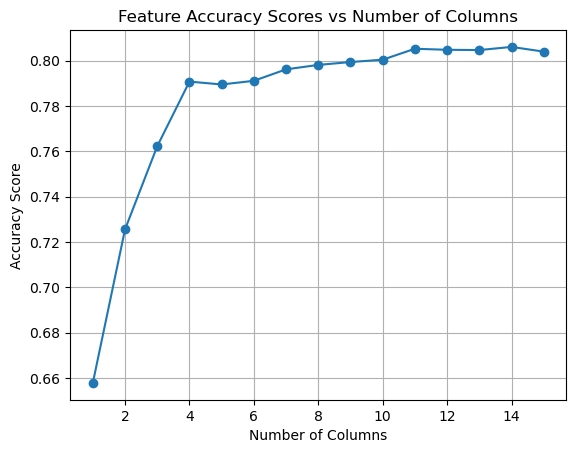

In [57]:
num_col = X_train.columns.shape[0];
feature_accuracy_scores = [];
for i in range(1,num_col+1):
    top_features = X.columns[sorted_indices[:i]];  # 15 Most important feature
    top_importances = result.importances_mean[sorted_indices[:i]];
    model = LGBMClassifier();
    scores = cross_val_score(model, X[top_features], y, cv=10, scoring='accuracy');
    feature_accuracy_scores.append(scores.mean());

#Plotting the graph
plt.plot(range(1, num_col+1), feature_accuracy_scores, marker='o')
plt.title('Feature Accuracy Scores vs Number of Columns')
plt.xlabel('Number of Columns')
plt.ylabel('Accuracy Score')
plt.grid(True)
plt.show()

Evaluating the accuracy scores of various different numbers of features reveals that going beyond 11 columns does not make a significant difference to accuracy, and may actually decrese accuracy in some cases. Thus 15 was chosen as a useful number of columns as accuracy is still maintained, and a good portion of the data is still used by the model.

## Optuna


In [ ]:
#define objective function for hyperparameter optimization using optuna
def objective_RandomForest(trial):

  #define hyperparameters to optimize for
  params = {
    "n_estimators" : trial.suggest_int('n_estimators', 50, 1000),
    "max_depth" : trial.suggest_int('max_depth', 10, 100),
    "min_samples_split" : trial.suggest_int('min_samples_split', 2, 20)
  }

  #create XGBClassifier model with optimized hyperparameters
  model = RandomForestClassifier(**params, random_state=0)
    
  #evaluate model using cross-validation
  #Depending on what features will be utilized replace X with the corresponding dataframe
  score = cross_val_score(model, X_FeatureSelection_LGM, y, cv=5).mean()
    
  return score

#run hyperparameter optimization with optuna
study.optimize(objective_RandomForest, n_trials=5)